In [1]:
import math
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [4]:
# 0. Cargar los datos de estatura y peso
url = 'http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights'

height_weight_df = pd.read_html(url)[1][['Height(Inches)','Weight(Pounds)']]
height_weight_df

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30
...,...,...
195,65.80,120.84
196,66.11,115.78
197,68.24,128.30
198,68.02,127.47


In [5]:
# 1. Count records in the dataframe

height_weight_df.shape

(200, 2)

In [6]:
 # 2. Crear una regresion lineal con estatura como variable explicatoria y peso como variable explicada

X = height_weight_df[['Height(Inches)']]
y = height_weight_df['Weight(Pounds)']

model = linear_model.LinearRegression()

reg = model.fit(X, y)
reg.score(X, y)

0.31009833265482667

In [7]:
# 3. Hallar el intercepto
reg.intercept_

np.float64(-106.02770644878126)

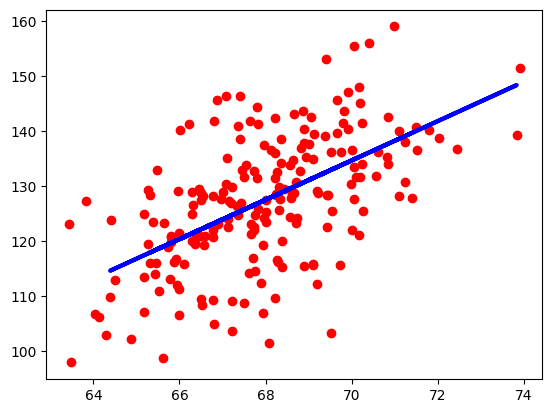

In [11]:
# 4. Hacer la grafica
plt.scatter(X, y, color='red')

# 80 20 split 
# Split the data into training/testing sets
X_train = X[:-40]
X_test = X[-40:]

# Split the targets into training/testing sets
y_train = y[:-40]
y_test = y[-40:]

# Make predictions using the testing set
y_pred = reg.predict(X_test)

plt.plot(X_test, y_pred, color="blue", linewidth=3)

In [9]:
# 5. Hallar correlacion y valor p
pearsonr(X['Height(Inches)'], y)

PearsonRResult(statistic=np.float64(0.5568647346122992), pvalue=np.float64(1.1029015151266312e-17))

In [10]:
mean_absolute_error(y, reg.predict(X))

np.float64(7.758737380388219)

# 6. Interpretar el valor p

### Resultados

- **Correlacion de Pearson**: 0.5568647346122992, mide la fuerza y dirección de la relación lineal entre dos variables.

- **Valor p**: 1.1029015151266312e-17 indica la significancia de la correlación.

- **Score (R^2)**: 0.31009833265482667 mide la proporción de la varianza en la variable dependiente que es predecible a partir de la variable independiente.

- **Intercepto**: -106.02770644 es el valor de la intersección en el eje y de la línea de regresión.

- **Forma del dataset**: (200, 2) indica que tu dataset tiene 200 filas y 2 columnas.


### Interpretación 

El valor p es una medida que determina la significancia de los resultados. Es la probabilidad de obtener un resultado al menos tan extremo como el observado, bajo la suposición de que la hipótesis nula es verdadera. Mide la evidencia en contra de la hipótesis nula.

- **Valor p bajo (por ejemplo, < 0.05)**: Indica que hay suficiente evidencia para rechazar la hipótesis nula. En este caso, el valor p es extremadamente bajo (1.1029015151266312e-17), lo que sugiere que la correlación observada no es debida al azar.
- **Valor p alto (por ejemplo, > 0.05)**: Indica que no hay suficiente evidencia para rechazar la hipótesis nula. 

Los resultados sugieren una correlación significativa entre las variables analizadas, con un coeficiente de correlación de Pearson moderado y un valor p bajo, lo que indica que la correlación observada no es debida al azar. Esto tambien puede inspeccionarse en la grafica generada.


### Referencias
- Cómo Interpretar Correctamente los Valores P - Minitab. https://blog.minitab.com/es/como-interpretar-correctamente-los-valores-p.
- https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression 
